# Explore here

In [1]:
# Your code here

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
main_df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=421&path=diabetes.csv')

In [4]:
main_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_df,test_df = train_test_split(main_df,random_state=46)

In [7]:
train_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
10,4,110,92,0,0,37.6,0.191,30,0
288,4,96,56,17,49,20.8,0.340,26,0
73,4,129,86,20,270,35.1,0.231,23,0
708,9,164,78,0,0,32.8,0.148,45,1
147,2,106,64,35,119,30.5,1.400,34,0
...,...,...,...,...,...,...,...,...,...
403,9,72,78,25,0,31.6,0.280,38,0
442,4,117,64,27,120,33.2,0.230,24,0
372,0,84,64,22,66,35.8,0.545,21,0
552,6,114,88,0,0,27.8,0.247,66,0


In [8]:
test_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
723,5,117,86,30,105,39.1,0.251,42,0
234,3,74,68,28,45,29.7,0.293,23,0
703,2,129,0,0,0,38.5,0.304,41,0
105,1,126,56,29,152,28.7,0.801,21,0
638,7,97,76,32,91,40.9,0.871,32,1
...,...,...,...,...,...,...,...,...,...
519,6,129,90,7,326,19.6,0.582,60,0
89,1,107,68,19,0,26.5,0.165,24,0
668,6,98,58,33,190,34.0,0.430,43,0
523,9,130,70,0,0,34.2,0.652,45,1


In [9]:
x_train = train_df.drop(columns=['Outcome'])
x_test = test_df.drop(columns = ['Outcome'])

In [10]:
y_train = train_df['Outcome']
y_test = test_df['Outcome']

In [11]:
from sklearn.metrics import recall_score,accuracy_score,f1_score,precision_score,confusion_matrix,classification_report

In [16]:
def model_evulator(x_matrix,y_matrix,model):
    preds = model.predict(x_matrix)
    print(f'accuracy_score : {accuracy_score(y_true=y_matrix,y_pred=preds)}')
    print(f'recall_score : {recall_score(y_true=y_matrix,y_pred=preds)}')
    print(f'f1_score : {f1_score(y_true=y_matrix,y_pred=preds)}')
    print(f'precision_score : {precision_score(y_true=y_matrix,y_pred=preds)}')
    print(f'confusion_matrix : \n{confusion_matrix(y_true= y_matrix, y_pred= preds)}')
    print(f'classification_report : \n{classification_report( y_true=y_matrix,y_pred=preds)}')

    

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf_model=RandomForestClassifier(random_state=46)

rf_model.fit(x_train,y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [19]:
model_evulator(x_train,y_train,rf_model)

accuracy_score : 1.0
recall_score : 1.0
f1_score : 1.0
precision_score : 1.0
confusion_matrix : 
[[376   0]
 [  0 200]]
classification_report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       200

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [20]:
model_evulator(x_test,y_test,rf_model)

accuracy_score : 0.7552083333333334
recall_score : 0.6764705882352942
f1_score : 0.6618705035971223
precision_score : 0.647887323943662
confusion_matrix : 
[[99 25]
 [22 46]]
classification_report : 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       124
           1       0.65      0.68      0.66        68

    accuracy                           0.76       192
   macro avg       0.73      0.74      0.74       192
weighted avg       0.76      0.76      0.76       192



Now we start Gradient Boosting

#1st model comes from sci-kit learn

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
gb_model = GradientBoostingClassifier()

In [23]:
gb_model.fit(x_train,y_train)

,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, 

In [24]:
model_evulator(x_train,y_train,gb_model)

accuracy_score : 0.9357638888888888
recall_score : 0.865
f1_score : 0.9033942558746736
precision_score : 0.9453551912568307
confusion_matrix : 
[[366  10]
 [ 27 173]]
classification_report : 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       376
           1       0.95      0.86      0.90       200

    accuracy                           0.94       576
   macro avg       0.94      0.92      0.93       576
weighted avg       0.94      0.94      0.94       576



In [25]:
model_evulator(x_test,y_test,gb_model)

accuracy_score : 0.7291666666666666
recall_score : 0.6911764705882353
f1_score : 0.6438356164383562
precision_score : 0.6025641025641025
confusion_matrix : 
[[93 31]
 [21 47]]
classification_report : 
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       124
           1       0.60      0.69      0.64        68

    accuracy                           0.73       192
   macro avg       0.71      0.72      0.71       192
weighted avg       0.74      0.73      0.73       192



In [36]:
hyperparameters_dict ={


    "n_estimators":[25,50,100],
    "learning_rate" : [0.1,0.2,0.3],
    "min_samples_split" : [2,4],
    "min_samples_leaf" : [4,8],
    "max_depth" :[None,2,4]
}

In [37]:
from sklearn.model_selection import GridSearchCV 

In [38]:
Gridsearch_model = GridSearchCV(
    estimator = GradientBoostingClassifier(),
    param_grid = hyperparameters_dict,
    scoring = "accuracy",
    verbose = 3
)

In [39]:
Gridsearch_model.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END learning_rate=0.1, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=25;, score=0.716 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=25;, score=0.748 total time=   0.3s
[CV 3/5] END learning_rate=0.1, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=25;, score=0.826 total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=25;, score=0.800 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=25;, score=0.722 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.716 total time=   0.3s
[CV 2/5] END learning_rate=0.1, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, sc

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",GradientBoostingClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'learning_rate': [0.1, 0.2, ...], 'max_depth': [None, 2, ...], 'min_samples_leaf': [4, 8], 'min_samples_split': [2, 4], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",None
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold an

In [40]:
model_evulator(x_train,y_train,Gridsearch_model)

accuracy_score : 0.8715277777777778
recall_score : 0.745
f1_score : 0.8010752688172043
precision_score : 0.8662790697674418
confusion_matrix : 
[[353  23]
 [ 51 149]]
classification_report : 
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       376
           1       0.87      0.74      0.80       200

    accuracy                           0.87       576
   macro avg       0.87      0.84      0.85       576
weighted avg       0.87      0.87      0.87       576



In [41]:
model_evulator(x_test,y_test,Gridsearch_model)

accuracy_score : 0.7239583333333334
recall_score : 0.6617647058823529
f1_score : 0.6293706293706294
precision_score : 0.6
confusion_matrix : 
[[94 30]
 [23 45]]
classification_report : 
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       124
           1       0.60      0.66      0.63        68

    accuracy                           0.72       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.73      0.72      0.73       192



In [42]:
from xgboost import XGBClassifier

In [43]:
xgb_model = XGBClassifier()

In [44]:
xgb_model.fit(x_train,y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [59]:
hyperparameter_dict = {
    'n_estimators' : [50,100,200],
    'learning_rate' : [0.2,0.3,0.4],
    'booster' : ['gblinear']
}

In [60]:
xgb_gridsearch_model = GridSearchCV(
    estimator =XGBClassifier(),
    param_grid = hyperparameter_dict,
    scoring = 'accuracy'
)

In [61]:
xgb_gridsearch_model.fit(x_train,y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBClassifier...ree=None, ...)"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'booster': ['gblinear'], 'learning_rate': [0.2, 0.3, ...], 'n_estimators': [50, 100, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",None
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displ

In [62]:
model_evulator(x_train, y_train, xgb_gridsearch_model.best_estimator_)

accuracy_score : 0.7777777777777778
recall_score : 0.56
f1_score : 0.6363636363636364
precision_score : 0.7368421052631579
confusion_matrix : 
[[336  40]
 [ 88 112]]
classification_report : 
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       376
           1       0.74      0.56      0.64       200

    accuracy                           0.78       576
   macro avg       0.76      0.73      0.74       576
weighted avg       0.77      0.78      0.77       576



In [63]:
model_evulator(x_train,y_train,xgb_gridsearch_model)

accuracy_score : 0.7777777777777778
recall_score : 0.56
f1_score : 0.6363636363636364
precision_score : 0.7368421052631579
confusion_matrix : 
[[336  40]
 [ 88 112]]
classification_report : 
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       376
           1       0.74      0.56      0.64       200

    accuracy                           0.78       576
   macro avg       0.76      0.73      0.74       576
weighted avg       0.77      0.78      0.77       576



In [64]:
model_evulator(x_test,y_test,xgb_gridsearch_model.best_estimator_)

accuracy_score : 0.7708333333333334
recall_score : 0.6176470588235294
f1_score : 0.65625
precision_score : 0.7
confusion_matrix : 
[[106  18]
 [ 26  42]]
classification_report : 
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       124
           1       0.70      0.62      0.66        68

    accuracy                           0.77       192
   macro avg       0.75      0.74      0.74       192
weighted avg       0.77      0.77      0.77       192



In [65]:
xgb_gridsearch_model.best_params_

{'booster': 'gblinear', 'learning_rate': 0.4, 'n_estimators': 200}

In [ ]:
xgb_gridsearch_model.best_estimator_.coef_
#burda hata almamizin sebebi bu booster in gbtree olmasi diger yerde gblinear yaoicam

AttributeError: Coefficients are not defined for Booster type gbtree

In [66]:
xgb_gridsearch_model.best_estimator_.coef_

array([ 0.139606  ,  0.0295877 , -0.0182571 ,  0.0010235 , -0.00067323,
        0.0713019 ,  0.539813  ,  0.0054626 ])

<Axes: >

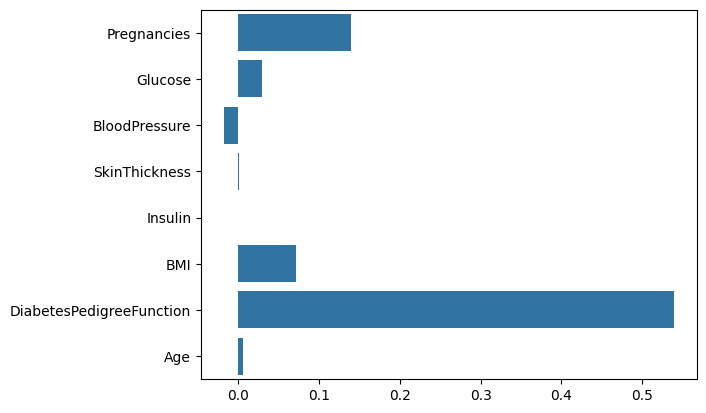

In [69]:
sns.barplot(x=xgb_gridsearch_model.best_estimator_.coef_,y=xgb_gridsearch_model.feature_names_in_)

Random Forest, feature importance hesaplamada çok güvenilir ve anlaşılır bir yöntemdir.
Çünkü:
Her ağacı ayrı ayrı kurar ve her split’te hangi feature kullanıldı ona bakar.
Yani hangi feature model için gerçekten belirleyici bunu net şekilde gösterir.
Boosting ise daha karmaşık:
Feature önemini belirler, ama önem sıralaması hatayı düzeltmeye odaklı olduğu için RF kadar doğrudan anlaşılır olmayabilir.

Yani boosting’de çıkan en önemli feature, modelin tahmin hatalarını düzeltmede kritik rol oynayan feature demektir, tek başına en güçlü olmak zorunda değil.